In [35]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [36]:
df = pd.read_csv("iluminacao_setor_sentitario.csv")

In [37]:
df.head()

il_id il_unidade             il_tipo  \
0    1.0      89344  Iluminação Pública   
1    2.0     141511  Iluminação Pública   
2    3.0     243032  Iluminação Pública   
3    4.0     243132  Iluminação Pública   
4    5.0     243232  Iluminação Pública   

                                        geometry      census_code  
0  POINT (-46.76673185533751 -23.80805094729951)  355030855000122  
1  POINT (-46.71756504940036 -23.77164743060888)  355030855000015  
2   POINT (-46.4012263782507 -23.51223359142612)  355030836000191  
3  POINT (-46.40142843591769 -23.51281878895792)  355030836000191  
4  POINT (-46.40119881697171 -23.51240542874111)  355030836000191

In [38]:
df["il_unidade"] = df["il_unidade"].str.extract("([\d]+)")

In [39]:
df["il_unidade"] = pd.to_numeric(df["il_unidade"])

In [40]:
df_gb = df.groupby("census_code").agg({"il_unidade":["sum", "mean", "min", "max"], "il_id":"count"})

In [41]:
df_il = df_gb["il_unidade"][["sum", "mean", "min", "max"]]

In [47]:
df_il["count"] = df_gb["il_id"]["count"].values

In [48]:
df_il = df_il.reset_index()

In [49]:
def rem_outliers(frame):
    from scipy.stats import iqr

    q1, q2, q3 = frame.quantile([0.25,0.5,0.75])

    v_std = np.std(frame)
    v_iqr = iqr(frame)

    v_max = q3 + 1.5 * v_iqr
    v_min = q1 - 1.5 * v_iqr

    new_items = [x if x < v_max and x > v_min else np.nan for x in frame]
    return new_items

In [50]:
df_il["mean"] = rem_outliers(df_il["mean"])

In [51]:
df_il["sum"] = rem_outliers(df_il["sum"])

In [61]:
df_il["count"] = rem_outliers(df_il["count"])

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_il[["sum", "mean", "min", "max"]]))
df_scaled.columns=["sum_norm", "mean_norm", "min_norm", "max_norm"]

In [63]:
df_scaled.describe()

sum_norm     mean_norm      min_norm      max_norm
count  16149.000000  16466.000000  17428.000000  17428.000000
mean       0.248390      0.318885      0.041312      0.095044
std        0.223318      0.192999      0.056446      0.176337
min        0.000000      0.000000      0.000000      0.000000
25%        0.061152      0.152746      0.017384      0.017158
50%        0.187270      0.316078      0.036387      0.034325
75%        0.376226      0.472345      0.059082      0.051451
max        1.000000      1.000000      1.000000      1.000000

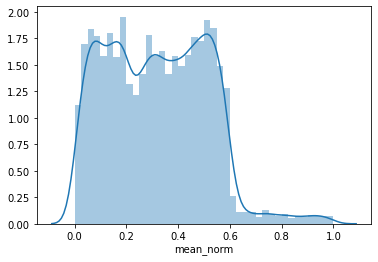

In [64]:
sns.distplot(df_scaled["mean_norm"])

In [65]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
df_standardized = pd.DataFrame(standard.fit_transform(df_il[["sum", "mean", "min", "max"]]))
df_standardized.columns=["sum_stand", "mean_stand", "min_stand", "max_stand"]

In [66]:
df_standardized.describe()

sum_stand    mean_stand     min_stand     max_stand
count  1.614900e+04  1.646600e+04  1.742800e+04  1.742800e+04
mean   4.223921e-17  2.640909e-16  1.426956e-17 -6.421304e-18
std    1.000031e+00  1.000030e+00  1.000029e+00  1.000029e+00
min   -1.112307e+00 -1.652310e+00 -7.318976e-01 -5.390084e-01
25%   -8.384638e-01 -8.608534e-01 -4.239216e-01 -4.417050e-01
50%   -2.736980e-01 -1.454169e-02 -8.725393e-02 -3.443462e-01
75%    5.724580e-01  7.951581e-01  3.148380e-01 -2.472214e-01
max    3.365758e+00  3.529214e+00  1.698462e+01  5.132116e+00

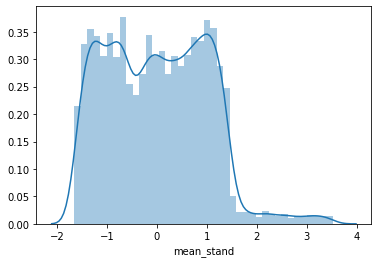

In [67]:
sns.distplot(df_standardized["mean_stand"])

In [68]:
df_il = pd.concat([df_il, df_scaled.reset_index(drop=True), df_standardized.reset_index(drop=True)], axis=1).set_index("census_code")

KeyError: "None of ['census_code'] are in the columns"

In [69]:
df_il.head()

sum           mean     min     max  count  sum_norm  \
census_code                                                                   
350900705000019   1701899.0  212737.375000  202709  229449    8.0  0.052945   
350900705000050    442119.0  221059.500000  221059  221060    2.0  0.013724   
350900705000051   1338964.0  223160.666667  202714  227252    6.0  0.041646   
350900705000067    442123.0  221061.500000  221061  221062    2.0  0.013725   
351380105000020  12990165.0  185573.785714  121007  212150   70.0  0.404378   

                 mean_norm  min_norm  max_norm  sum_stand  mean_stand  \
census_code                                                             
350900705000019   0.237057  0.030094  0.024618  -0.875217   -0.423992   
350900705000050   0.246337  0.032818  0.023716  -1.050848   -0.375909   
350900705000051   0.248680  0.030095  0.024381  -0.925815   -0.363769   
350900705000067   0.246339  0.032819  0.023716  -1.050848   -0.375897   
351380105000020   0.206768  0.017965  0.022758   0.698525   -0.580938   

                 min_stand  max_stand  
census_code                            
350900705000019  -0.198732  -0.399399  
350900705000050  -0.150468  -0.404513  
350900705000051  -0.198719  -0.400739  
350900705000067  -0.150463  -0.404512  
351380105000020  -0.413625  -0.409945

In [70]:
df_il.to_csv("var_iluminacao.csv")